<a href="https://colab.research.google.com/github/andidprastyo/PCVK_Ganjil_2023/blob/main/week%20-%2007/filtering_spasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 07 - Filtering Spasial

Nama : Andi Dwi Prastyo <br>
NIM : 2141720046 <br>
Kelas : TI - 3H <br>
Absen : 06 <br>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [8]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image as im

### Convolution Function

In [24]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [25]:
img_m = cv.imread('./drive/MyDrive/Images/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)

img_gray = cv.cvtColor(img_m, cv.COLOR_BGR2GRAY)

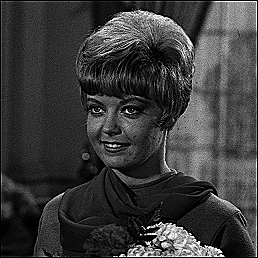

In [26]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

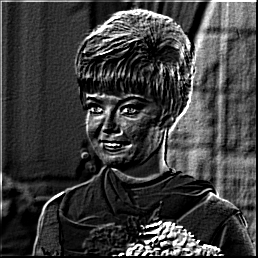

In [27]:
emboss_sharpen = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

cv2_imshow(convolution2d(img_gray, emboss_sharpen, 1, 2))

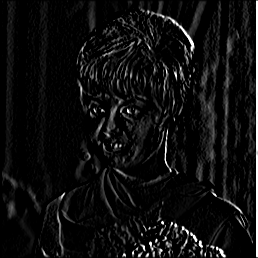

In [29]:
left_sobel_edge_detection = np.array([[1,0,-1],
                              [2,0,-2],
                              [1,0,-1]])

cv2_imshow(convolution2d(img_gray, left_sobel_edge_detection, 1, 2))

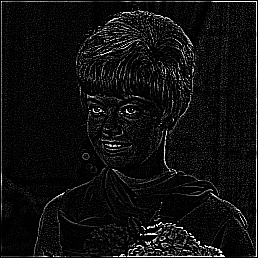

In [34]:
canny_edge_detection = np.array([[-1,-1,-1],
                                  [-1,8,-1],
                                  [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, canny_edge_detection, 1, 2))

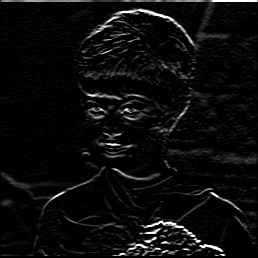

In [35]:
prewitt_detection = np.array([[-1,-1,-1],
                              [0,0,0],
                              [1,1,1]])

cv2_imshow(convolution2d(img_gray, prewitt_detection, 1, 2))

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)

gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = np.outer(gaussian_kernel, gaussian_kernel)

blurred_img = cv2.filter2D(img, -1, gaussian_kernel_2d)
